# Problem Statement

#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

#### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

#### The company wants to know:
* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

#### Also, determine the optimal value of lambda for ridge and lasso regression.

 

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [3]:
# Read CSV file

houseData=pd.read_csv(r"D:\Upgrad Files\Assignment2-ridge-lasso\train (1).csv")
houseData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# To check list of Columns
houseData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Information about dataset
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
houseData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#The missing value percentage column-wise
missing_percentage=pd.DataFrame((houseData.isna().sum()/len(houseData)*100).items(),columns=['column_name','missing_percentage'])
missing=pd.concat([missing_percentage])
missing.sort_values(by='missing_percentage',ascending=False).head(50)

,column_name,missing_percentage
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425
57,FireplaceQu,47.260274
3,LotFrontage,17.739726
59,GarageYrBlt,5.547945
64,GarageCond,5.547945
58,GarageType,5.547945
60,GarageFinish,5.547945


In [8]:
# checking if there is one unique value, since it won't help in analysis
houseData.nunique().sort_values()

CentralAir         2
Utilities          2
Street             2
Alley              2
BsmtHalfBath       3
                ... 
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Id              1460
Length: 81, dtype: int64

In [9]:
# To check number of distinct values in each column
missing_columns=['LotFrontage','GarageYrBlt','Electrical','MasVnrType','MasVnrArea','GarageQual','GarageType','GarageCond','GarageFinish','BsmtFinType2']
for i in missing_columns:
    print(houseData[i].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
TA    1326
Fa      35
Gd       9
Po    

In [10]:
houseData['GarageYrBlt']=houseData['GarageYrBlt'].fillna(0)
houseData['Electrical']=houseData['Electrical'].fillna("other")
houseData['MasVnrType']=houseData['MasVnrType'].fillna('None')
houseData['MasVnrArea']=houseData['MasVnrArea'].fillna(0)
houseData['GarageQual']=houseData['GarageQual'].fillna('NA')
houseData['GarageType']=houseData['GarageType'].fillna('NA')
houseData['GarageCond']=houseData['GarageCond'].fillna('NA')
houseData['GarageFinish']=houseData['GarageFinish'].fillna('NA')
houseData['BsmtFinType2']=houseData['BsmtFinType2'].fillna('NA')


In [11]:
# After replacing null values in the column
houseData['BsmtFinType2'].value_counts()


Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [12]:
# Replacing Missing Values
houseData['BsmtFinType2']=houseData['BsmtFinType2'].fillna('NA')
houseData['PoolQC']=houseData['PoolQC'].fillna('NA')
houseData['MiscFeature']=houseData['MiscFeature'].fillna('NA')
houseData['Alley']=houseData['Alley'].fillna('NA')
houseData['Fence']=houseData['Fence'].fillna('NA')
houseData['FireplaceQu']=houseData['FireplaceQu'].fillna('NA')
houseData['BsmtExposure']=houseData['BsmtExposure'].fillna('NA')
houseData['BsmtFinType2']=houseData['BsmtFinType2'].fillna('NA')
houseData['BsmtQual']=houseData['BsmtQual'].fillna('NA')
houseData['BsmtCond']=houseData['BsmtCond'].fillna('NA')
houseData['BsmtFinType1']=houseData['BsmtFinType1'].fillna('NA')



In [13]:

# Dropping LotFrontage since it as more missing values
houseData=houseData.drop(columns=['LotFrontage'],axis='columns')


In [14]:
# Dropping Id which doesn't adds any information
houseData=houseData.drop(columns=['Id'],axis='columns')


In [15]:
# Information about dataset after replacing null values
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non

In [16]:
# selecting only object type values
houseDataObject=houseData.select_dtypes(include = ['object'])
houseDataObject.shape

(1460, 43)

In [17]:
# selecting only int and float type values
houseDataNumeric=houseData.select_dtypes(include = ['float64','int64'])
houseDataNumeric.shape

(1460, 36)

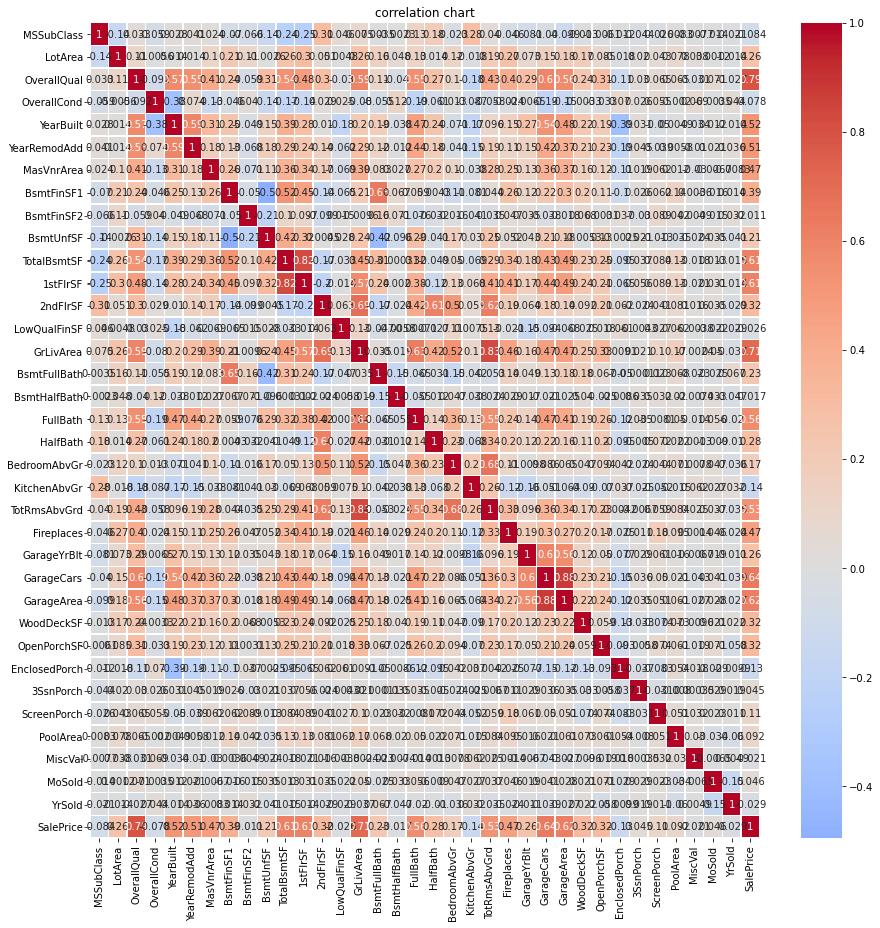

In [18]:
# Heatmap for analyzing correlation between the columns
corr = houseDataNumeric.corr()
corr
plt.figure(figsize=(15,15))
plt.title("correlation chart")
sns.heatmap(corr,annot=True,cmap="coolwarm" ,linewidths=.5,center=0)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
MSZoning


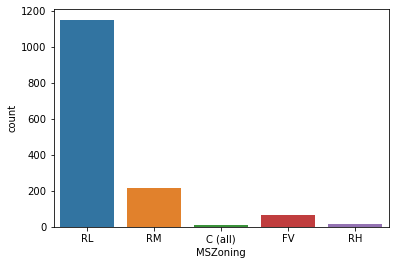

Pave    1454
Grvl       6
Name: Street, dtype: int64
Street


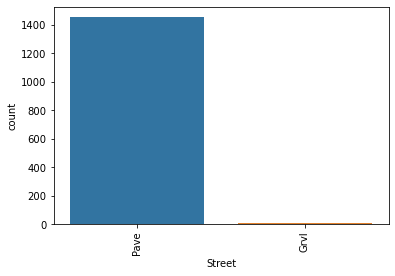

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
Alley


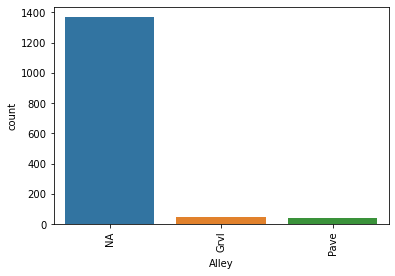

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LotShape


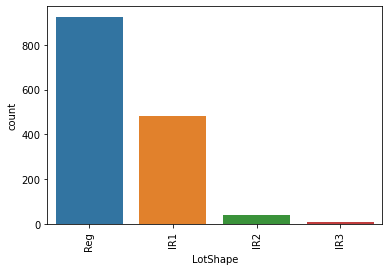

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
LandContour


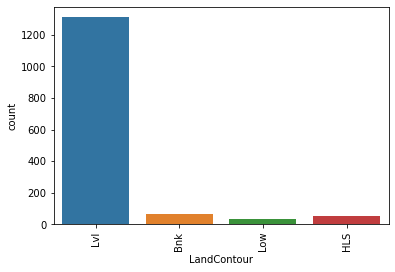

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Utilities


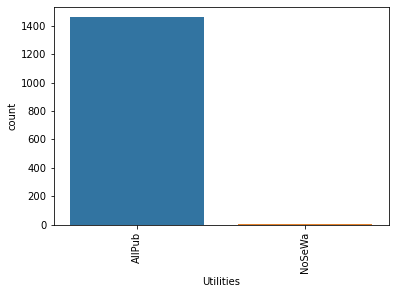

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LotConfig


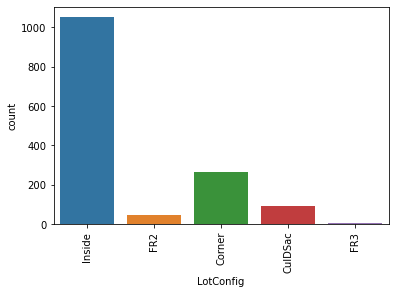

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
LandSlope


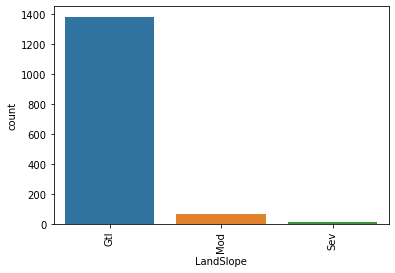

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Neighborhood


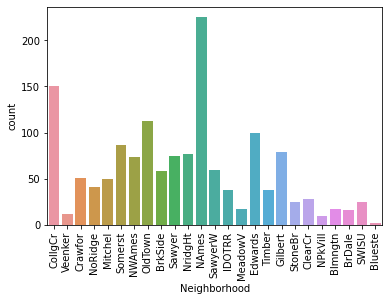

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Condition1


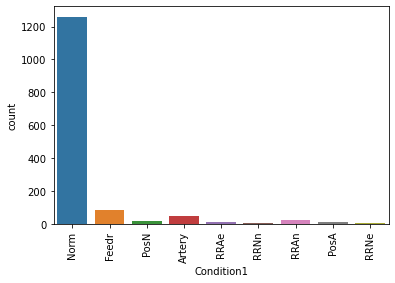

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
Condition2


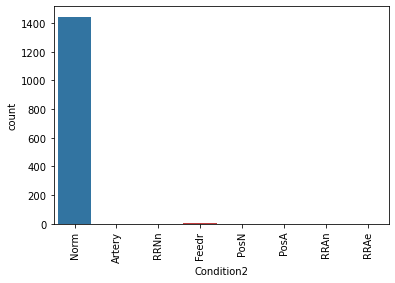

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
BldgType


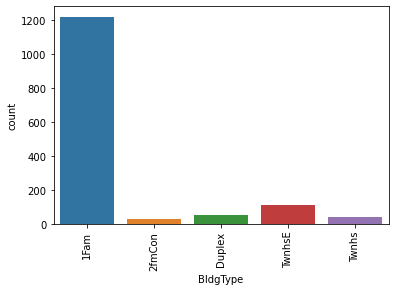

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
HouseStyle


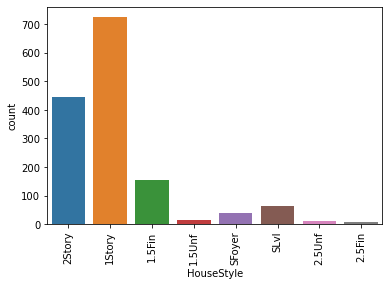

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
RoofStyle


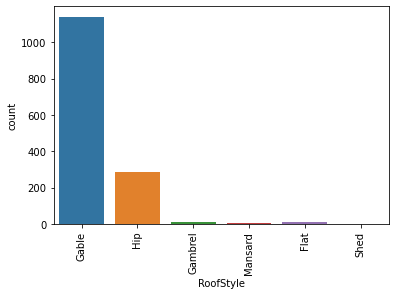

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64
RoofMatl


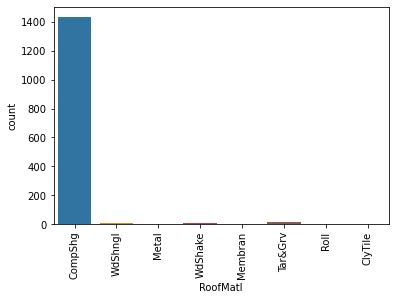

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
Exterior1st


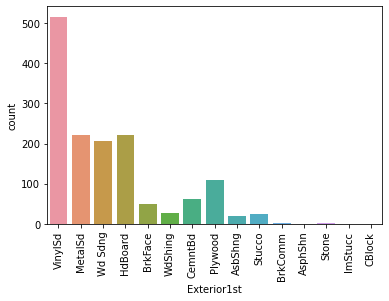

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
Exterior2nd


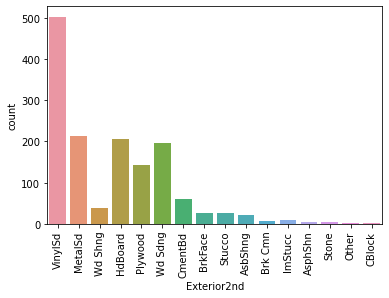

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
MasVnrType


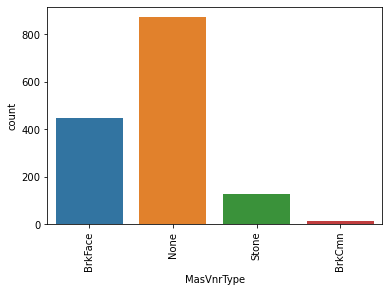

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
ExterQual


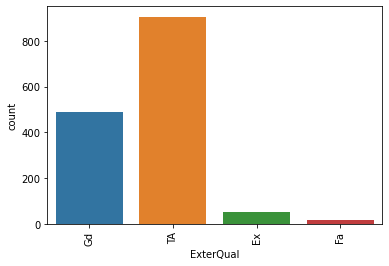

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
ExterCond


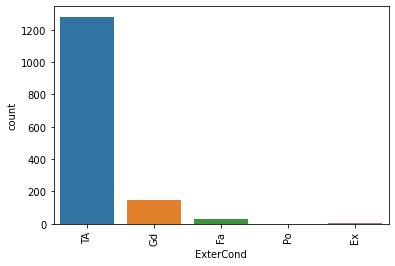

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
Foundation


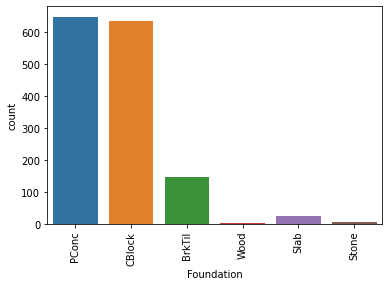

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64
BsmtQual


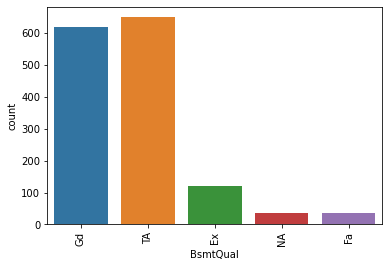

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64
BsmtCond


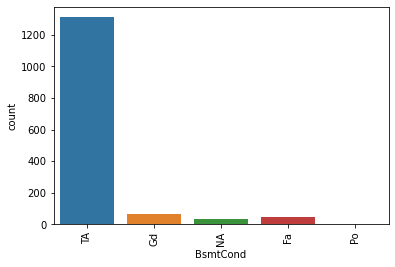

No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64
BsmtExposure


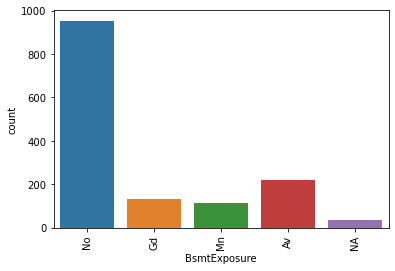

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64
BsmtFinType1


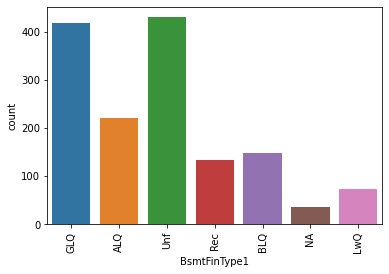

Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
BsmtFinType2


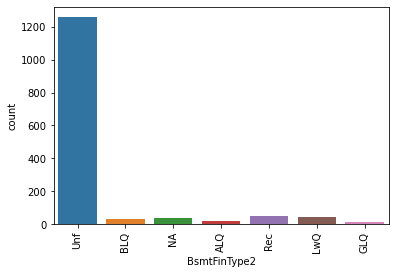

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Heating


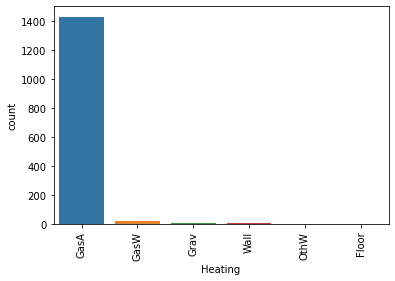

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
HeatingQC


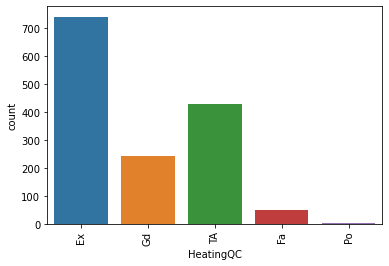

Y    1365
N      95
Name: CentralAir, dtype: int64
CentralAir


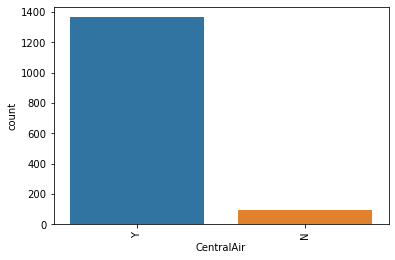

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
other       1
Name: Electrical, dtype: int64
Electrical


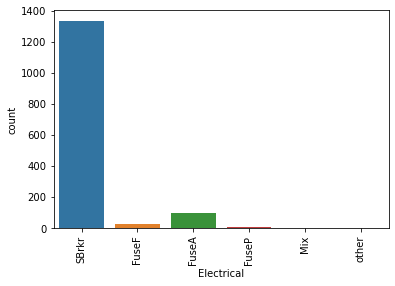

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
KitchenQual


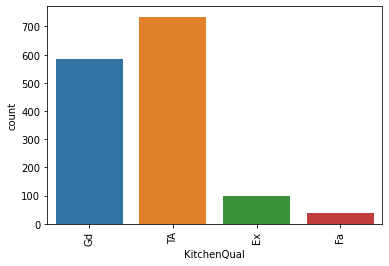

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
Functional


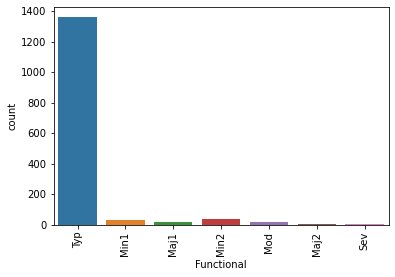

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
FireplaceQu


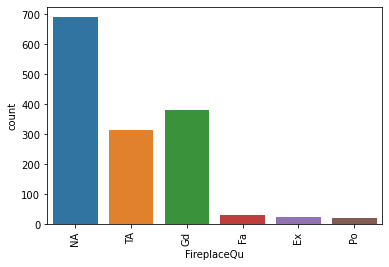

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
GarageType


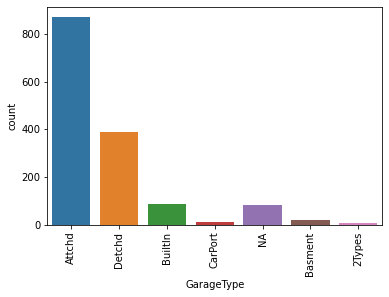

Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64
GarageFinish


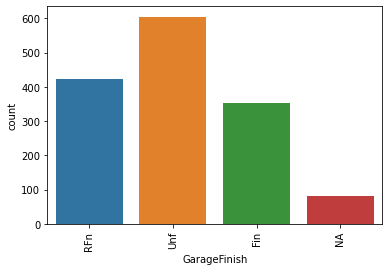

TA    1311
NA      81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
GarageQual


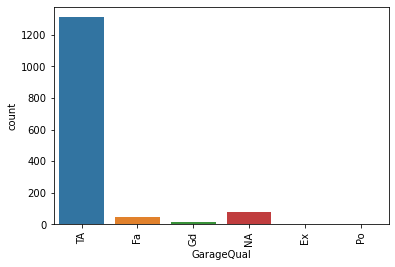

TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
GarageCond


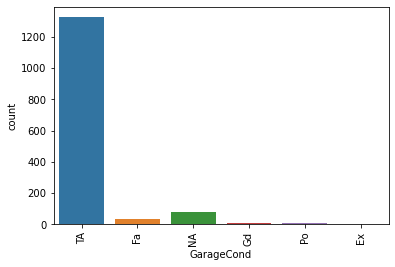

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
PavedDrive


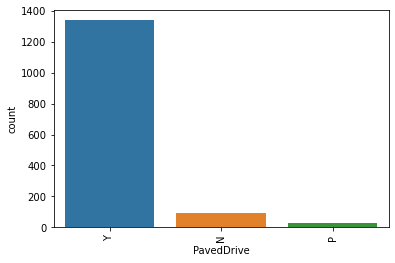

NA    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64
PoolQC


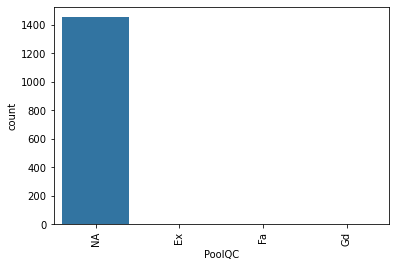

NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
Fence


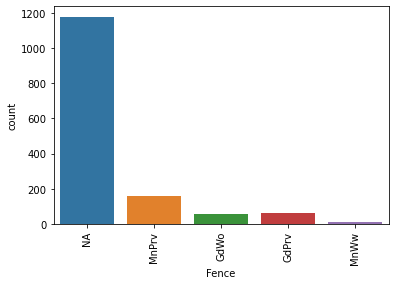

NA      1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64
MiscFeature


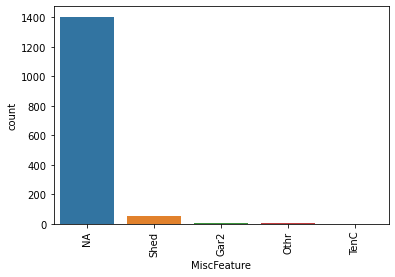

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
SaleType


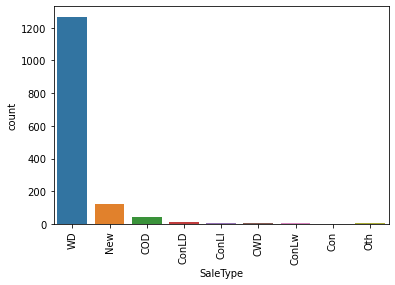

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
SaleCondition


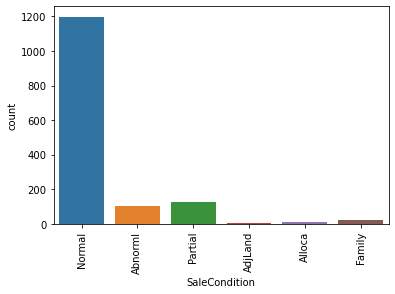

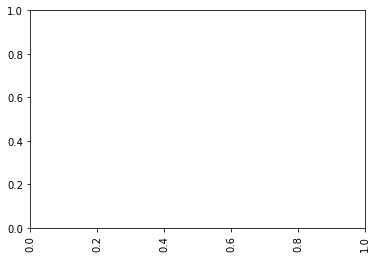

In [19]:
# Univariate and Segmented Analysis

categorical_values=houseDataObject
for i in categorical_values:
    print(houseDataObject[i].value_counts())
    print(i)
    sns.countplot(x=i,data=houseDataObject)
    plt.show()
    plt.xticks(rotation=90)

* Most of the sales are fromm Residential Low Density Zone.
* Most of the sales property roads are Pave Type.
* Most of the sales property have the Unknown alley access.
* Most of the sales property are regular,Flat/level,Have All Public utilties,Inside Lot, Gentle Slope,NArmes location,Normal Condition,1Farm type dwelling(building type),Gable type roof,Vinsylsd type of exterior,No Basement Exposure,GasA type heating,Central Air type,Standard Circuit Breakers & Romex Electrical,Average Garage quality and Condition,Warranty Deed - Conventional type of sale,Normal SaleCondition

In [20]:
# converting into one hot encoding
houseDataObject_onehot = pd.get_dummies(houseDataObject, drop_first=True)
houseDataObject_onehot.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
houseDataFinal = pd.concat([houseDataObject_onehot, houseDataNumeric],axis='columns')
houseDataFinal

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,1,0,0,0,1,...,0,61,0,0,0,0,0,2,2008,208500
1,0,0,1,0,1,1,0,0,0,1,...,298,0,0,0,0,0,0,5,2007,181500
2,0,0,1,0,1,1,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500
3,0,0,1,0,1,1,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000
4,0,0,1,0,1,1,0,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,1,0,0,0,1,...,0,40,0,0,0,0,0,8,2007,175000
1456,0,0,1,0,1,1,0,0,0,1,...,349,0,0,0,0,0,0,2,2010,210000
1457,0,0,1,0,1,1,0,0,0,1,...,0,60,0,0,0,0,2500,5,2010,266500
1458,0,0,1,0,1,1,0,0,0,1,...,366,0,112,0,0,0,0,4,2010,142125


In [22]:
# splitting values into input and output variables
X=houseDataFinal.drop(['SalePrice'],axis='columns')
Y=houseDataFinal['SalePrice']


### Splitting into train and test

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size = 0.7, random_state = 100)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1021, 259) (439, 259) (1021,) (439,)


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Predictions on the basis of the model
y_pred = lm.predict(X_test)
y_pred

array([ 1.22660000e+05,  1.96658000e+05,  1.54298000e+05,  2.04914000e+05,
        1.81401756e+16,  2.47992000e+05,  2.07760000e+05,  3.11260000e+05,
        9.67900000e+04,  1.70720000e+05,  2.07060000e+05,  1.86690000e+05,
        1.73958000e+05, -6.67958102e+16,  1.02988000e+05,  1.42638000e+05,
        1.80846000e+05,  1.23722000e+05,  1.40016000e+05,  1.10892000e+05,
        1.71610000e+05,  9.69340000e+04,  1.29546000e+05,  9.90140000e+04,
        1.84482000e+05,  1.23664000e+05,  5.48080000e+04,  1.02880000e+05,
        1.88922000e+05,  1.63780000e+05,  1.59034000e+05,  2.00690000e+05,
        2.24620000e+05,  8.86180000e+04,  1.20072000e+05,  6.85460000e+04,
        1.27536000e+05, -7.15005156e+15,  1.74202000e+05,  1.07418000e+05,
        3.50300000e+05,  2.20232000e+05,  1.59582000e+05,  7.99480000e+04,
        1.81058000e+05,  7.01680000e+04,  4.96122152e+11,  1.50434000e+05,
        1.42994000e+05,  9.76980000e+04,  2.17168000e+05,  1.29568000e+05,
        3.39862000e+05,  

In [29]:
r2_score(y_test, y_pred) 

-7.508612176505205e+22

In [30]:
# Metrics to assess model performance
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
# Root Mean Squared Error
print(rmse)

2.121727419509637e+35
4.833092071775938e+32
2.1984294557196824e+16


## Ridge Regression

In [31]:
# list of alphas to tune
params = {'alpha': [0.0001,0.0002, 0.001, 0.01, 0.05, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,500 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.01, 0.05, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [32]:
#checking the value of optimum number of parameters
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 0.2}
-18628.61979919105


In [33]:
cv_results_ridge = pd.DataFrame(ridge_cv.cv_results_)
cv_results_ridge = cv_results_ridge[cv_results_ridge['param_alpha']<=1000]
cv_results_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028794,0.001592,0.000642,0.001283,0.0001,{'alpha': 0.0001},-20917.546326,-20803.968665,-19853.313306,-17317.407564,...,-19440.802557,1413.694755,23,-11170.554799,-11445.821713,-11309.282828,-11360.382752,-11012.055204,-11259.619459,152.650938
1,0.020311,0.002863,0.001519,0.002302,0.0002,{'alpha': 0.0002},-20624.648774,-20801.885185,-19911.412292,-17378.310589,...,-19403.653945,1343.080507,22,-11204.678985,-11445.995734,-11337.362174,-11401.804998,-11041.386573,-11286.245693,147.034717
2,0.025013,0.006841,0.001720,0.003439,0.001,{'alpha': 0.001},-19578.966549,-20785.573374,-20144.661030,-17655.268748,...,-19293.469856,1157.357304,21,-11403.835683,-11447.331196,-11516.920858,-11589.931152,-11195.325152,-11430.668808,133.557627
3,0.018741,0.006258,0.006258,0.007665,0.01,{'alpha': 0.01},-18561.873075,-20642.503987,-20266.932150,-17861.506088,...,-19108.182692,1127.798834,10,-11658.865499,-11455.478151,-11748.579487,-11820.891964,-11398.625284,-11616.488077,163.959341
4,0.022554,0.004765,0.001829,0.002412,0.05,{'alpha': 0.05},-18016.588756,-20400.226401,-19976.731694,-17388.782296,...,-18722.122353,1221.851106,2,-11839.590012,-11480.585645,-11843.866059,-11917.711785,-11655.498129,-11747.450326,159.026189
5,0.026622,0.003236,0.000000,0.000000,0.2,{'alpha': 0.2},-17716.537982,-20168.429970,-19930.664082,-17071.565086,...,-18628.619799,1221.602713,1,-12498.213192,-11626.716663,-12297.667580,-12555.375641,-12518.758050,-12299.346225,348.044258
6,0.024399,0.002693,0.001806,0.002610,0.3,{'alpha': 0.3},-17802.891874,-20164.780427,-20094.617158,-17103.566308,...,-18774.625847,1217.879309,3,-12867.126812,-11734.868402,-12568.232692,-12964.503969,-12948.210507,-12616.588476,463.369483
7,0.026854,0.002795,0.000575,0.000931,0.4,{'alpha': 0.4},-17836.584587,-20175.765244,-20205.525807,-17128.039885,...,-18881.733825,1235.110525,4,-13161.072928,-11837.736219,-12772.858330,-13291.822134,-13290.403062,-12870.778535,550.344998
8,0.025451,0.005663,0.000565,0.001130,0.5,{'alpha': 0.5},-17863.118501,-20196.571555,-20300.868273,-17175.093003,...,-18969.894733,1252.260329,5,-13407.347421,-11936.423540,-12936.046491,-13558.401659,-13571.195963,-13081.883015,617.376702
9,0.021539,0.007418,0.004769,0.006285,0.6,{'alpha': 0.6},-17873.763136,-20219.111064,-20368.747558,-17253.944827,...,-19041.136096,1257.662160,6,-13620.581767,-12032.366794,-13077.365006,-13787.103217,-13801.316943,-13263.746745,669.514703


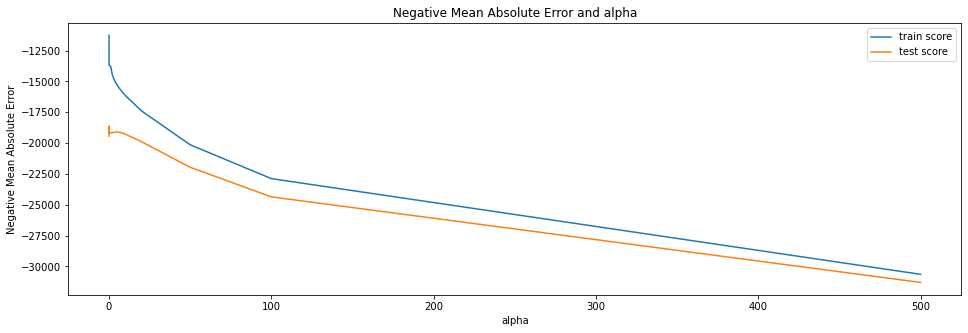

In [34]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [35]:
#final ridge model
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
# Prediction on test set
y_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_pred))

0.9437088174738133


In [37]:
# Prediction on test set
y_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_pred))

0.7348796607258398


In [38]:
# Printing the RMSE value
mean_squared_error(y_test, y_pred)

1706508446.157197

In [39]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef1= pd.Series(ridge.coef_, index= X.columns)
top10_ridge1=  ridge_coef1[abs(ridge_coef1).nlargest(10).index]
top10_ridge1

PoolQC_Gd          -424683.794033
Condition2_PosN    -295426.324403
GrLivArea           128536.078763
RoofMatl_WdShngl    122598.456112
1stFlrSF            108680.264634
2ndFlrSF             99258.472552
LotArea              92411.185087
TotalBsmtSF          76988.076803
BsmtFinSF1           74366.096518
RoofMatl_Membran     73747.282440
dtype: float64

### Lasso

In [40]:
#lasso
# list of alphas to tune
params = {'alpha': [0.0001,0.0002, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 100,500 ,1000]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   37.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [41]:
#checking the value of optimum number of parameters
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 100}
-16921.16911466049


In [42]:
cv_results_lasso = pd.DataFrame(lasso_cv.cv_results_)
cv_results_lasso = cv_results_lasso[cv_results_lasso['param_alpha']<=500]
cv_results_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.323580,0.018429,0.000100,0.000200,0.0001,{'alpha': 0.0001},-19478.747298,-20570.316718,-20349.660786,-17505.801383,...,-19225.615263,1191.442023,23,-11440.735362,-11489.220272,-11612.937772,-11687.065217,-11268.127853,-11499.617295,145.010893
1,0.324184,0.015469,0.002011,0.003122,0.0002,{'alpha': 0.0002},-19478.688076,-20570.199544,-20349.770730,-17506.444596,...,-19225.713880,1191.262206,24,-11440.739171,-11489.216710,-11612.942322,-11687.069821,-11268.130726,-11499.619750,145.011619
2,0.316953,0.027810,0.004715,0.006248,0.001,{'alpha': 0.001},-19478.214302,-20569.262233,-20350.650253,-17511.170262,...,-19226.423501,1189.942268,25,-11440.773125,-11489.188222,-11612.981595,-11687.110547,-11268.161081,-11499.642914,145.016249
3,0.303125,0.020610,0.000000,0.000000,0.01,{'alpha': 0.01},-19472.878236,-20558.677473,-20360.940276,-17539.352609,...,-19229.731266,1182.222177,26,-11441.330189,-11488.929760,-11613.461649,-11687.678063,-11268.618855,-11500.003703,145.050703
4,0.308343,0.020627,0.004696,0.006233,0.05,{'alpha': 0.05},-19449.119337,-20511.399432,-20364.926188,-17497.995586,...,-19204.186838,1186.645044,22,-11444.307062,-11488.318588,-11616.096475,-11690.206267,-11270.914787,-11501.968636,145.158969
5,0.308917,0.017890,0.000000,0.000000,0.1,{'alpha': 0.1},-19419.288111,-20460.666304,-20366.903498,-17465.199779,...,-19177.383508,1188.016598,21,-11448.421790,-11487.636197,-11619.786739,-11693.499848,-11273.838404,-11504.636596,145.358733
6,0.318747,0.017360,0.003307,0.004053,0.2,{'alpha': 0.2},-19359.383549,-20413.903911,-20368.660126,-17446.374901,...,-19144.121528,1188.640928,20,-11457.128266,-11486.573747,-11626.976535,-11700.138877,-11280.236315,-11510.210748,145.582719
7,0.314502,0.018764,0.002158,0.003116,0.3,{'alpha': 0.3},-19299.036706,-20378.980459,-20361.449381,-17425.633009,...,-19111.640210,1190.238053,19,-11466.400477,-11485.464257,-11633.195230,-11707.101479,-11287.088898,-11515.850068,145.634626
8,0.318670,0.018820,0.003530,0.007061,0.4,{'alpha': 0.4},-19238.803451,-20353.333471,-20343.144485,-17407.772452,...,-19078.423126,1191.746351,18,-11476.299244,-11484.623666,-11638.944348,-11714.017777,-11294.119048,-11521.600817,145.575608
9,0.324686,0.028650,0.001952,0.003661,0.5,{'alpha': 0.5},-19181.626629,-20330.960129,-20328.761441,-17393.507807,...,-19047.924091,1194.142156,17,-11486.713924,-11484.818476,-11645.693488,-11720.761351,-11301.635720,-11527.924592,145.477585


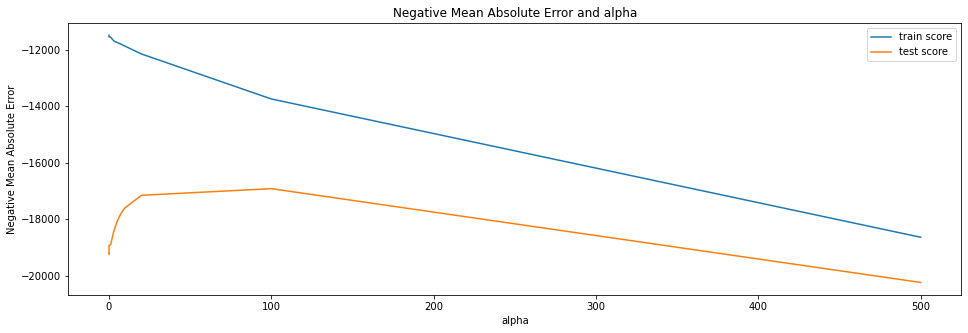

In [43]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [61]:
#final Lasso model
alpha = 100

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)


Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
# Prediction on test set
y_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_pred))

0.9255911860717361


In [63]:
# Prediction on test set
y_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_pred))

0.7321377490527332


In [64]:
# Printing the RMSE value
mean_squared_error(y_test, y_pred)

1724157395.4667206

In [65]:
# Top 10 features with the value of optimal alpha in Lasso and these varibales are significant for predicting the price of a house 
lasso_coef1= pd.Series(lasso.coef_, index= X.columns)
top10_lasso1=  lasso_coef1[abs(lasso_coef1[lasso_coef1 != 0]).nlargest(10).index]
top10_lasso1

PoolQC_Gd              -384765.044854
GrLivArea               261495.979126
Condition2_PosN        -248128.257490
TotalBsmtSF              83695.219196
OverallQual              81759.613870
RoofMatl_WdShngl         52708.108131
Neighborhood_NoRidge     39927.411611
OverallCond              32244.013916
LotArea                  31187.386642
KitchenQual_Gd          -27050.376354
dtype: float64

* Optimal alpha (lambda) value for Ridge Regression model is: 0.2
* Optimal alpha (lambda) value for Lasso Regression model is: 100

## Assignment II

### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [66]:
# Ridge model
alpha = 0.4
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)

# Prediction on test set
y_pred = ridge2.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_pred))

0.790024147716891


In [67]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef2= pd.Series(ridge2.coef_, index= X.columns)
top10_ridge2=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top10_ridge2

PoolQC_Gd          -311861.026805
Condition2_PosN    -225879.668775
GrLivArea           116080.524033
RoofMatl_WdShngl    110890.115443
1stFlrSF             96132.987214
2ndFlrSF             93617.968126
LotArea              71308.168001
OverallQual          68200.288384
TotalBsmtSF          56977.248630
BsmtFinSF1           53565.202870
dtype: float64

In [69]:
#final Lasso model
alpha = 200

lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train, y_train)

# Prediction on test set
y_pred = lasso2.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_pred))

0.8330557195129775


In [70]:
# Top 10 features with double the value of optimal alpha in Lasso
lasso_coef2= pd.Series(lasso2.coef_, index= X.columns)
top10_lasso2=  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
top10_lasso2

GrLivArea               251002.825632
PoolQC_Gd              -163074.924765
OverallQual              99185.405648
Condition2_PosN         -87923.754385
Neighborhood_NoRidge     46359.267255
RoofMatl_WdShngl         39317.451921
GarageCars               34837.414313
Neighborhood_NridgHt     27100.857151
MSSubClass              -26994.635089
KitchenQual_TA          -24847.714398
dtype: float64

## After removing 5 most import predictor varibales in the lasso model

In [71]:
houseDataFinal1=houseDataFinal.drop(columns=['GrLivArea','PoolQC_Gd','OverallQual','Condition2_PosN','Neighborhood_NoRidge'])

In [72]:
# splitting values into input and output variables
X1=houseDataFinal1.drop(['SalePrice'],axis='columns')
Y1=houseDataFinal1['SalePrice']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1,train_size = 0.7, random_state = 100)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
#lasso
# list of alphas to tune
params = {'alpha': [0.0001,0.0002, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 100,500 ,1000]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train1, y_train1)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   41.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [74]:
#checking the value of optimum number of parameters
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)



{'alpha': 100}
-19753.784016970967


In [75]:
#final Lasso model
alpha = 100

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

#final Lasso model
alpha = 100

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

# Top 10 features with double the value of optimal alpha in Lasso
lasso_coef1= pd.Series(lasso.coef_, index= X.columns)
top10_lasso1=  lasso_coef1[abs(lasso_coef1[lasso_coef1 != 0]).nlargest(10).index]
top10_lasso1

PoolQC_Gd              -384765.044854
GrLivArea               261495.979126
Condition2_PosN        -248128.257490
TotalBsmtSF              83695.219196
OverallQual              81759.613870
RoofMatl_WdShngl         52708.108131
Neighborhood_NoRidge     39927.411611
OverallCond              32244.013916
LotArea                  31187.386642
KitchenQual_Gd          -27050.376354
dtype: float64